In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\timot\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0, 0.5, '')

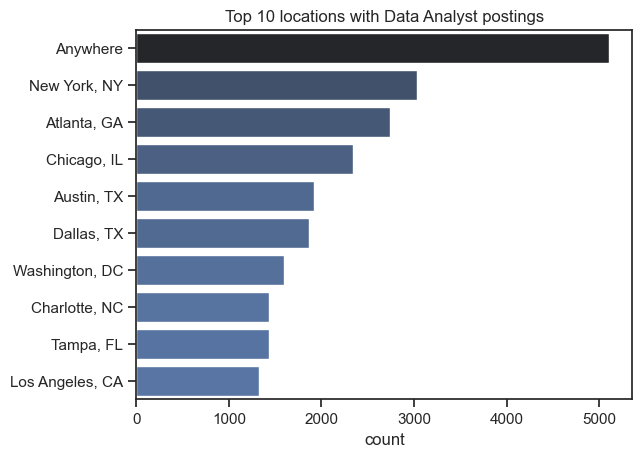

In [26]:

df_DA_US = df[(df['job_country']=='United States') & (df['job_title_short'] == 'Data Analyst')].copy()

df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style = 'ticks')
sns.barplot(df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r', legend = False)
plt.title('Top 10 locations with Data Analyst postings')
plt.ylabel('')

In [27]:
df_DA_US.head(1)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None


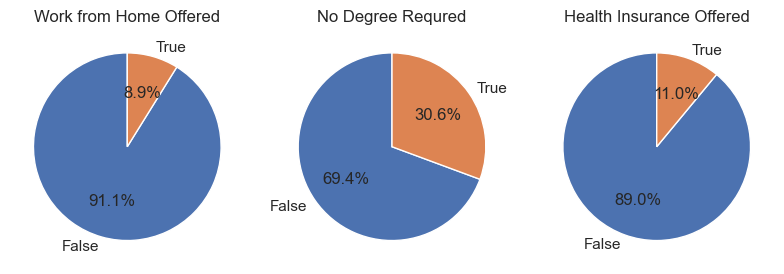

In [67]:
pie_dict = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'No Degree Requred', 
    'job_health_insurance': 'Health Insurance Offered'}

fig,ax = plt.subplots(1,3, figsize = (8,5))

for i,(item,title) in enumerate(pie_dict.items()):
    df[item].value_counts().plot(kind = 'pie', ax = ax[i], startangle = 90, autopct='%1.1f%%')
    ax[i].set_title(title)
    ax[i].set_ylabel("")

fig.tight_layout()

Text(0, 0.5, '')

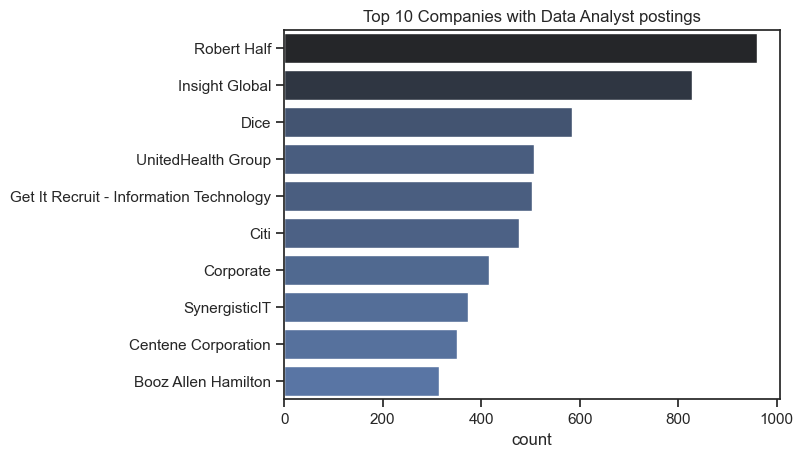

In [69]:
df_DA_US = df[(df['job_country']=='United States') & (df['job_title_short'] == 'Data Analyst')].copy()

df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style = 'ticks')
sns.barplot(df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
plt.title('Top 10 Companies with Data Analyst postings')
plt.ylabel('')